In [53]:
import keras as tf
tf.__version__
#keras version'2.2.2'
#tensorflow 1.10

'2.2.2'

In [59]:
mnist=tf.datasets.mnist  #28*28 images from 0 to 9

(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=tf.utils.normalize(X_train,axis=1)
X_test=tf.utils.normalize(X_test,axis=1)

model=tf.models.Sequential()
model.add(tf.layers.Flatten())

model.add(tf.layers.Dense(128,activation='relu'))
model.add(tf.layers.Dense(128,activation='relu'))
model.add(tf.layers.Dense(10,activation='softmax'))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy'
             ,metrics=['accuracy']
             )

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.2591 - acc: 0.9236
Epoch 2/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.1052 - acc: 0.9674
Epoch 3/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0721 - acc: 0.9771
Epoch 4/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.0531 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0408 - acc: 0.9870


In [61]:
val_loss,val_acc=model.evaluate(X_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 61us/step
0.10003491198185366 0.9711


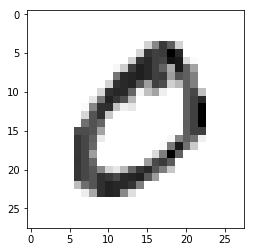

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap=plt.cm.binary)  # this is to check what is image and cmap=plt.cm.binary to change color to binary
plt.show()

In [62]:
model.save('num_reader.model')

In [63]:
model_read=tf.models.load_model('num_reader.model')

In [64]:
predictions=model_read.predict([X_test])

In [68]:
print(np.argmax(predictions[5]))

1


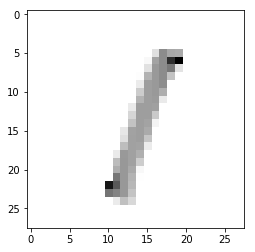

In [67]:
plt.imshow(X_test[5], cmap=plt.cm.binary)  # this is to check what is image and cmap=plt.cm.binary to change color to binary
plt.show()